In [4]:
from sqlalchemy import create_engine

In [3]:
import keyring
import requests as rq
from io import BytesIO
import zipfile
import xmltodict
import json
import pandas as pd
from sqlalchemy import create_engine
import pymysql
from datetime import date
from dateutil.relativedelta import relativedelta
from tqdm import tqdm
import os

In [ ]:
pip install tensorflow


In [12]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [4]:
ip =  '52.79.207.181'

In [5]:
ip =  '52.79.207.181'
engine = create_engine(f'mysql+pymysql://jun:1234qwer@{ip}:3306/quant')
con = pymysql.connect(user='jun',
                      passwd='1234qwer',
                      host= ip,
                      db='quant',
                      charset='utf8')
mycursor = con.cursor()

In [6]:
sql_query = """
SELECT * FROM df
"""

# con을 사용하여 데이터를 읽음
stock_price = pd.read_sql_query(sql_query, con)

/var/folders/c1/z5tw921j2td15y6sk95kpgn40000gn/T/ipykernel_48377/572412913.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  stock_price = pd.read_sql_query(sql_query, con)


In [38]:
stock_price

index        date    open    high     low   close    volume  \
0              0  2018-09-20  6810.0  7120.0  6670.0  7030.0  181397.0   
1              1  2018-09-21  7110.0  7130.0  6270.0  6490.0  359049.0   
2              2  2018-09-27  6600.0  6600.0  6220.0  6360.0  210740.0   
3              3  2018-09-28  6530.0  6530.0  5980.0  6160.0  171325.0   
4              4  2018-10-01  6160.0  6350.0  6050.0  6180.0   77744.0   
...          ...         ...     ...     ...     ...     ...       ...   
2671740  2671740  2023-09-14  6330.0  7170.0  6300.0  6610.0  240627.0   
2671741  2671741  2023-09-15  6640.0  6670.0  6520.0  6610.0   28387.0   
2671742  2671742  2023-09-18  6610.0  6610.0  6350.0  6400.0   29544.0   
2671743  2671743  2023-09-19  6400.0  6460.0  6350.0  6370.0    9452.0   
2671744  2671744  2023-09-20  6370.0  6430.0  6310.0  6370.0   13180.0   

        stock_code stock_name  
0           095570     AJ네트웍스  
1           095570     AJ네트웍스  
2           095570     AJ네트웍스  
3           095570     AJ네트웍스  
4           095570     AJ네트웍스  
...            ...        ...  
2671740     238490         힘스  
2671741     238490         힘스  
2671742     238490         힘스  
2671743     238490         힘스  
2671744     238490         힘스  

[2671745 rows x 9 columns]

In [39]:
samsung = stock_price[stock_price['stock_name'] == '삼성전자']

In [45]:
samsung['date'] = pd.to_datetime(samsung['date'])

/var/folders/c1/z5tw921j2td15y6sk95kpgn40000gn/T/ipykernel_49264/2070405596.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  samsung['date'] = pd.to_datetime(samsung['date'])


In [46]:
samsung

index       date     open     high      low    close      volume  \
435567  435567 2018-09-20  46850.0  47600.0  46400.0  47250.0  13537000.0   
435568  435568 2018-09-21  46550.0  47550.0  46550.0  47400.0  14476900.0   
435569  435569 2018-09-27  46950.0  47500.0  46450.0  47500.0  15804600.0   
435570  435570 2018-09-28  47250.0  47250.0  46300.0  46450.0  11270500.0   
435571  435571 2018-10-01  46450.0  46800.0  45800.0  46350.0   6354980.0   
...        ...        ...      ...      ...      ...      ...         ...   
436796  436796 2023-09-14  71200.0  71800.0  70800.0  71700.0  21041400.0   
436797  436797 2023-09-15  71700.0  72300.0  71400.0  72000.0  17823500.0   
436798  436798 2023-09-18  71300.0  71700.0  70200.0  70200.0  16040700.0   
436799  436799 2023-09-19  70400.0  70800.0  69600.0  69800.0  11820200.0   
436800  436800 2023-09-20  70000.0  70300.0  69500.0  69600.0  10541100.0   

       stock_code stock_name  
435567     005930       삼성전자  
435568     005930       삼성전자  
435569     005930       삼성전자  
435570     005930       삼성전자  
435571     005930       삼성전자  
...           ...        ...  
436796     005930       삼성전자  
436797     005930       삼성전자  
436798     005930       삼성전자  
436799     005930       삼성전자  
436800     005930       삼성전자  

[1234 rows x 9 columns]

In [29]:
data = stock_price

# data.set_index('date', inplace=True)


In [30]:
data.head(5)

index        date    open    high     low   close    volume stock_code  \
0      0  2018-09-20  6810.0  7120.0  6670.0  7030.0  181397.0     095570   
1      1  2018-09-21  7110.0  7130.0  6270.0  6490.0  359049.0     095570   
2      2  2018-09-27  6600.0  6600.0  6220.0  6360.0  210740.0     095570   
3      3  2018-09-28  6530.0  6530.0  5980.0  6160.0  171325.0     095570   
4      4  2018-10-01  6160.0  6350.0  6050.0  6180.0   77744.0     095570   

  stock_name  
0     AJ네트웍스  
1     AJ네트웍스  
2     AJ네트웍스  
3     AJ네트웍스  
4     AJ네트웍스

In [11]:
stock_code_list = data['stock_code'].drop_duplicates().tolist()

In [12]:
stock_code_list

['095570',
 '006840',
 '027410',
 '282330',
 '138930',
 '001460',
 '001040',
 '079160',
 '000120',
 '011150',
 '097950',
 '000480',
 '000590',
 '012030',
 '016610',
 '005830',
 '000990',
 '139130',
 '001530',
 '000210',
 '001880',
 '375500',
 '007340',
 '004840',
 '155660',
 '069730',
 '017940',
 '383220',
 '007700',
 '114090',
 '078930',
 '006360',
 '001250',
 '007070',
 '012630',
 '039570',
 '089470',
 '294870',
 '009540',
 '267250',
 '267270',
 '322000',
 '042670',
 '267260',
 '329180',
 '097230',
 '014790',
 '003580',
 '204320',
 '060980',
 '011200',
 '082740',
 '035000',
 '003560',
 '175330',
 '234080',
 '001060',
 '096760',
 '105560',
 '002380',
 '344820',
 '009070',
 '009440',
 '119650',
 '092220',
 '003620',
 '016380',
 '001390',
 '033180',
 '015590',
 '001940',
 '025000',
 '092230',
 '000040',
 '044450',
 '030200',
 '033780',
 '058850',
 '058860',
 '093050',
 '003550',
 '034220',
 '051900',
 '373220',
 '032640',
 '011070',
 '066570',
 '037560',
 '051910',
 '079550',
 '006260',

In [60]:
data[data['stock_code'] == '465770']

Empty DataFrame
Columns: [open, high, low, close, volume, stock_code]
Index: []

In [56]:
a = []
for i in stock_code_list:
    if len(data[data['stock_code'] == i]) < 30:
        a.append(i)



In [57]:
a

['465770',
 '092790',
 '462520',
 '424960',
 '429270',
 '418250',
 '373170',
 '146060',
 '384470',
 '448710',
 '445680',
 '355390',
 '440110']

In [58]:
data.drop(data[data['stock_code'].isin(a)].index, inplace=True)


/var/folders/c1/z5tw921j2td15y6sk95kpgn40000gn/T/ipykernel_27176/639182828.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(data[data['stock_code'].isin(a)].index, inplace=True)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# 시드(seed) 값 설정
np.random.seed(42)

# 필요한 열만 선택
data = data[['open', 'high', 'low', 'close', 'volume', 'stock_code']]

# MinMaxScaler를 통한 데이터 스케일링 (0과 1 사이의 값으로 스케일)
scaler = MinMaxScaler()

# 결과 저장을 위한 빈 리스트 생성
predicted_prices_list = []
actual_prices_list = []
stock_codes_list = []

# 각 주식 코드 별로 LSTM 모델 학습 및 예측
unique_stock_codes = data['stock_code'].unique()

for stock_code in unique_stock_codes:
    stock_data = data[data['stock_code'] == stock_code]
    
    # 데이터 스케일링
    scaled_data = scaler.fit_transform(stock_data[['open', 'high', 'low', 'close', 'volume']])
    
    # 시계열 데이터 생성 (look_back=7로 설정)
    X, y = [], []
    look_back = 7  # 7일 동안의 데이터를 사용하여 예측
    
    for i in range(len(scaled_data) - look_back):
        X.append(scaled_data[i:i+look_back])
        y.append(scaled_data[i+look_back])
    X, y = np.array(X), np.array(y)
    
    # 데이터 분할 (학습 및 테스트 세트)
    train_size = int(len(X) * 0.8)  # 80%를 학습 데이터로 사용
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    
    # LSTM 모델 구축
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', input_shape=(look_back, 5)))
    model.add(Dense(units=5))  # 출력 차원을 5로 설정 (open, high, low, close, volume)
    
    # 옵티마이저 설정
    optimizer = Adam(learning_rate=0.001)  # 학습률 설정
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    
    # 조기 종료 콜백 추가
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
    
    # LSTM 입력 데이터의 형태 재구성
    X_train = np.reshape(X_train, (X_train.shape[0], look_back, 5))
    X_test = np.reshape(X_test, (X_test.shape[0], look_back, 5))
    
    # 모델 학습
    model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=1)
    
    # 모델 예측
    predictions = model.predict(X_test)
    
    # 예측 결과를 역 스케일링하여 원래 주가로 변환
    predictions = scaler.inverse_transform(predictions)
    y_test = scaler.inverse_transform(y_test)
    
    # 예측 결과 및 실제 결과를 리스트에 추가
    predicted_prices_list.append(predictions)
    actual_prices_list.append(y_test)
    stock_codes_list.extend([stock_code] * predictions.shape[0])

# 예측값과 실제값을 DataFrame으로 만들기
predicted_prices_df = pd.DataFrame(np.concatenate(predicted_prices_list, axis=0), columns=['Open', 'High', 'Low', 'Close', 'Volume'])
actual_prices_df = pd.DataFrame(np.concatenate(actual_prices_list, axis=0), columns=['Open', 'High', 'Low', 'Close', 'Volume'])

# 주식 코드 열 추가
predicted_prices_df['stock_code'] = stock_codes_list
actual_prices_df['stock_code'] = stock_codes_list


In [34]:
X_train

array([], shape=(0, 7, 5), dtype=float64)

In [33]:
print(X_train.shape)
print(y_train.shape)


(0, 7, 5)
(0,)


In [26]:
print(np.isnan(X_train).any())
print(np.isnan(y_train).any())

False
False


In [35]:
stock_data

open     high      low    close     volume stock_code
168772  25100.0  32600.0  25100.0  32600.0  1930740.0     465770
168773  35000.0  38200.0  25750.0  26200.0  8667880.0     465770
168774  25400.0  28750.0  23150.0  23500.0  3314910.0     465770
168775  26550.0  30550.0  25700.0  30550.0  8257740.0     465770

In [46]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler



# 필요한 열 선택
data = data[['open', 'high', 'low', 'close', 'volume', 'stock_code']]

# 날짜 열을 인덱스로 설정
data.index = pd.to_datetime(data.index)

# 데이터 스케일링 (MinMax 스케일러 사용)
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)


In [49]:
X, y = [], []
look_back = 7  # 7일 동안의 데이터를 사용하여 예측

for i in range(len(scaled_data) - look_back):
    X.append(scaled_data[i:i+look_back])
    y.append(scaled_data[i+look_back])

X, y = np.array(X), np.array(y)


In [50]:
train_size = int(len(X) * 0.8)  # 80%를 학습 데이터로 사용
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(look_back, scaled_data.shape[1])))
model.add(Dense(units=scaled_data.shape[1]))  # 출력 차원을 입력 차원과 동일하게 설정
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=32)


In [47]:
data

open    high     low   close    volume stock_code
date                                                           
2018-09-20  6810.0  7120.0  6670.0  7030.0  181397.0     095570
2018-09-21  7110.0  7130.0  6270.0  6490.0  359049.0     095570
2018-09-27  6600.0  6600.0  6220.0  6360.0  210740.0     095570
2018-09-28  6530.0  6530.0  5980.0  6160.0  171325.0     095570
2018-10-01  6160.0  6350.0  6050.0  6180.0   77744.0     095570
...            ...     ...     ...     ...       ...        ...
2023-09-01  6760.0  7050.0  6630.0  6950.0   62354.0     238490
2023-09-04  6950.0  6960.0  6700.0  6750.0   26307.0     238490
2023-09-05  6690.0  6920.0  6690.0  6750.0   11830.0     238490
2023-09-06  6750.0  6790.0  6590.0  6610.0   14462.0     238490
2023-09-07  6560.0  6670.0  6480.0  6540.0   16008.0     238490

[2650408 rows x 6 columns]

In [53]:
len(data['stock_code'].unique())

2369

AttributeError: 'numpy.ndarray' object has no attribute 'count'

In [39]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 데이터 프레임 로드

# 필요한 열 선택
data = data[['open', 'high', 'low', 'close', 'volume', 'stock_code']]

# # 날짜 열을 인덱스로 설정
# data['date'] = pd.to_datetime(data['date'])
# data.set_index('date', inplace=True)

# MinMaxScaler를 통한 데이터 스케일링 (0과 1 사이의 값으로 스케일)
scaler = MinMaxScaler()

# 각 주식 코드 별로 LSTM 모델 학습 및 예측
unique_stock_codes = data['stock_code'].unique()

# 결과를 저장할 리스트 초기화
predicted_prices = []

for stock_code in unique_stock_codes:
    stock_data = data[data['stock_code'] == stock_code]
    
    # 데이터 스케일링
    scaled_data = scaler.fit_transform(stock_data[['open', 'high', 'low', 'close', 'volume']])
    
    # 시계열 데이터 생성 (look_back=7로 설정)
    X, y = [], []
    look_back = 7  # 7일 동안의 데이터를 사용하여 예측
    
    for i in range(len(scaled_data) - look_back):
        X.append(scaled_data[i:i+look_back])
        y.append(scaled_data[i+look_back])
    X, y = np.array(X), np.array(y)
    
    # 데이터 분할 (학습 및 테스트 세트)
    train_size = int(len(X) * 0.8)  # 80%를 학습 데이터로 사용
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]

    # LSTM 모델 구축
    model = Sequential()
    model.add(LSTM(units=50, activation='relu', input_shape=(look_back, scaled_data.shape[1])))
    model.add(Dense(units=scaled_data.shape[1]))  # 출력 차원을 입력 차원과 동일하게 설정
    model.compile(optimizer='adam', loss='mean_squared_error')
    
    # 모델 학습
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)
    
    # 모델 예측
    predictions = model.predict(X_test)
    
    # 예측 결과를 역 스케일링하여 원래 주가로 변환
    predictions = scaler.inverse_transform(predictions)
    y_test = scaler.inverse_transform(y_test)
    predicted_prices.append(predictions)
    
    # 여기에서 예측 결과를 저장하거나 분석에 활용할 수 있습니다.
    
# 예측값을 하나의 배열로 변환
predicted_prices_array = np.concatenate(predicted_prices, axis=0)

# 예측값을 DataFrame으로 만들기
predicted_prices_df = pd.DataFrame(predicted_prices_array, columns=['Open', 'High', 'Low', 'Close', 'Volume'])

# 각 예측값에 해당하는 stock_code 열 추가
stock_codes = np.repeat(unique_stock_codes, len(y_test))
predicted_prices_df['stock_code'] = stock_codes

# 예측값을 출력
print(predicted_prices_df)


Epoch 1/10
31/31 [==============================] - 2s 4ms/step - loss: 0.1118
Epoch 2/10
31/31 [==============================] - 0s 4ms/step - loss: 0.0056
Epoch 3/10
31/31 [==============================] - 0s 4ms/step - loss: 0.0015
Epoch 4/10
31/31 [==============================] - 0s 4ms/step - loss: 0.0014
Epoch 5/10
31/31 [==============================] - 0s 4ms/step - loss: 0.0013
Epoch 6/10
31/31 [==============================] - 0s 4ms/step - loss: 0.0012
Epoch 7/10
31/31 [==============================] - 0s 4ms/step - loss: 0.0011
Epoch 8/10
31/31 [==============================] - 0s 4ms/step - loss: 0.0011
Epoch 9/10
31/31 [==============================] - 0s 4ms/step - loss: 0.0010
Epoch 10/10
8/8 [==============================] - 0s 3ms/step
Epoch 1/10
31/31 [==============================] - 1s 4ms/step - loss: 0.0542
Epoch 2/10
31/31 [==============================] - 0s 7ms/step - loss: 0.0030
Epoch 3/10
31/31 [==============================] - 0s 4ms/step - lo

ValueError: Expected input data to be non-empty.

In [40]:
X_train

array([], dtype=float64)

In [63]:
# 예측값을 하나의 배열로 변환
predicted_prices_array = np.concatenate(predicted_prices, axis=0)



In [64]:
# 예측값을 DataFrame으로 만들기
predicted_prices_df = pd.DataFrame(predicted_prices_array, columns=['Open', 'High', 'Low', 'Close', 'Volume'])



In [66]:
predicted_prices_df

Open         High          Low        Close         Volume
0       8067.351074  8216.807617  7787.000000  8075.943848  -88733.445312
1       7969.963379  8119.508301  7695.504395  7975.371094  -65712.515625
2       7941.884277  8093.510254  7667.104980  7937.713867  -51268.863281
3       7993.764648  8148.140625  7713.443359  7981.071289  -57507.527344
4       8095.119141  8246.407227  7801.178711  8067.311035  -52342.117188
...             ...          ...          ...          ...            ...
279364  1364.556641  1475.464722  1292.592896  1777.733521  438344.187500
279365  1380.060913  1477.786133  1301.984497  1778.650635  259715.656250
279366  1400.866455  1497.879272  1324.461304  1790.335327  294003.625000
279367  1402.990234  1514.930542  1325.132202  1790.132690  440397.406250
279368  1347.088135  1469.525879  1271.530273  1768.416992  496591.062500

[279369 rows x 5 columns]

In [65]:
len(predicted_prices_df)

279369

In [62]:
print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (0,)
y shape: (0,)


In [45]:
y_test

array([], dtype=float64)

In [46]:
473501 / 7

67643.0

In [ ]:
# 각 예측값에 해당하는 stock_code 열 추가
stock_codes = np.repeat(unique_stock_codes, len(y_test))
predicted_prices_df['stock_code'] = stock_codes

# 예측값을 출력
print(predicted_prices_df)

In [68]:
len(unique_stock_codes)

2359

In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 데이터 프레임 로드 (data는 이미 로드되어 있다고 가정합니다)
# 필요한 열 선택
data = data[['date', 'open', 'high', 'low', 'close', 'volume', 'stock_code']]

# MinMaxScaler를 통한 데이터 스케일링 (0과 1 사이의 값으로 스케일)
scaler = MinMaxScaler()

# 날짜를 기준으로 정렬
data.sort_values(by=['stock_code', 'date'], inplace=True)

# 각 주식 코드 별로 LSTM 모델 학습 및 예측
unique_stock_codes = data['stock_code'].unique()

# 결과를 저장할 리스트 초기화
predicted_prices = []
errors = []  # 발생한 오류 메시지를 저장할 리스트 추가

# 에포크와 look_back 설정
epochs = 10
look_backs = data.groupby('stock_code').apply(lambda x: min(7, len(x))).to_dict()

for stock_code in unique_stock_codes:
    try:
        look_back = look_backs.get(stock_code, 0)  # 해당 stock_code에 대한 look_back 값
        stock_data = data[data['stock_code'] == stock_code]
        
        # 데이터 스케일링
        scaled_data = scaler.fit_transform(stock_data[['open', 'high', 'low', 'close', 'volume']])
        
        # 시계열 데이터 생성 (look_back 값 사용)
        X, y = [], []
        dates = []  # 날짜를 저장할 리스트
        for i in range(len(scaled_data) - look_back):
            X.append(scaled_data[i:i+look_back])
            y.append(scaled_data[i+look_back])
            dates.append(stock_data.iloc[i+look_back]['date'])  # 예측할 날짜를 저장
            
        X, y = np.array(X), np.array(y)
        
        # 데이터 분할 (학습 및 테스트 세트)
        train_size = int(len(X) * 0.8)  # 80%를 학습 데이터로 사용
        X_train, X_test = X[:train_size], X[train_size:]
        y_train, y_test = y[:train_size], y[train_size:]
        dates_test = dates[train_size:]  # 테스트 날짜
        
        # LSTM 모델 구축
        model = Sequential()
        model.add(LSTM(units=50, activation='relu', input_shape=(look_back, scaled_data.shape[1])))
        model.add(Dense(units=scaled_data.shape[1]))  # 출력 차원을 입력 차원과 동일하게 설정
        model.compile(optimizer='adam', loss='mean_squared_error')
        
        # 모델 학습
        model.fit(X_train, y_train, epochs=epochs, batch_size=32, verbose=1)
        
        # 모델 예측
        predictions = model.predict(X_test)
        
        # 예측 결과를 역 스케일링하여 원래 주가로 변환
        predictions = scaler.inverse_transform(predictions)
        y_test = scaler.inverse_transform(y_test)
        
        # 예측값을 저장
        predicted_prices.append((stock_code, dates_test, predictions))
        
    except Exception as e:
        error_message = f"Error occurred for stock_code: {stock_code}, Error: {str(e)}"
        print(error_message)  # 콘솔에 출력하여 확인
        errors.append(error_message)  # 발생한 오류 메시지를 리스트에 저장
        continue

# 결과를 DataFrame으로 만들기
predicted_prices_dict = {
    'stock_code': [],
    'date': [],
    'Open': [],
    'High': [],
    'Low': [],
    'Close': [],
    'Volume': []
}

for stock_code, dates, predictions in predicted_prices:
    for date, prediction in zip(dates, predictions):
        predicted_prices_dict['stock_code'].append(stock_code)
        predicted_prices_dict['date'].append(date)
        predicted_prices_dict['Open'].append(prediction[0])
        predicted_prices_dict['High'].append(prediction[1])
        predicted_prices_dict['Low'].append(prediction[2])
        predicted_prices_dict['Close'].append(prediction[3])
        predicted_prices_dict['Volume'].append(prediction[4])

# DataFrame을 CSV 파일로 저장
predicted_prices_df = pd.DataFrame(predicted_prices_dict)
predicted_prices_df.to_csv('predicted_prices.csv', index=False)

# 발생한 오류 메시지를 파일로 저장
with open('errors.txt', 'w') as f:
    for error in errors:
        f.write("%s\n" % error)

print("CSV 파일로 저장되었습니다.")


/var/folders/c1/z5tw921j2td15y6sk95kpgn40000gn/T/ipykernel_49264/3381343552.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values(by=['stock_code', 'date'], inplace=True)


Epoch 1/10
31/31 [==============================] - 5s 6ms/step - loss: 0.0643
Epoch 2/10
31/31 [==============================] - 0s 5ms/step - loss: 0.0073
Epoch 3/10
31/31 [==============================] - 0s 5ms/step - loss: 0.0038
Epoch 4/10
31/31 [==============================] - 0s 6ms/step - loss: 0.0036
Epoch 5/10
31/31 [==============================] - 0s 8ms/step - loss: 0.0033
Epoch 6/10
31/31 [==============================] - 0s 8ms/step - loss: 0.0031
Epoch 7/10
31/31 [==============================] - 0s 7ms/step - loss: 0.0028
Epoch 8/10
31/31 [==============================] - 0s 7ms/step - loss: 0.0026
Epoch 9/10
31/31 [==============================] - 0s 7ms/step - loss: 0.0025
Epoch 10/10
8/8 [==============================] - 0s 3ms/step
Epoch 1/10
31/31 [==============================] - 2s 5ms/step - loss: 0.0820
Epoch 2/10
31/31 [==============================] - 0s 6ms/step - loss: 0.0043
Epoch 3/10
31/31 [==============================] - 0s 5ms/step - lo

In [34]:
predicted_prices_df[predicted_prices_df['stock_code'] == '000020']

stock_code        date         Open          High          Low  \
0       000020  2022-09-27  8692.839844   8716.754883  8512.808594   
1       000020  2022-09-28  8533.989258   8543.791016  8360.756836   
2       000020  2022-09-29  8406.572266   8406.838867  8229.577148   
3       000020  2022-09-30  8295.397461   8316.621094  8129.668945   
4       000020  2022-10-04  8197.531250   8229.506836  8030.024902   
..         ...         ...          ...           ...          ...   
241     000020  2023-09-14  9789.545898   9925.475586  9690.695312   
242     000020  2023-09-15  9834.817383   9975.708008  9746.131836   
243     000020  2023-09-18  9879.294922  10015.796875  9787.781250   
244     000020  2023-09-19  9901.087891  10023.003906  9805.396484   
245     000020  2023-09-20  9898.823242  10008.380859  9799.742188   

           Close         Volume  
0    8773.968750  138717.718750  
1    8630.996094  132672.000000  
2    8506.647461  133555.343750  
3    8392.537109  122346.468750  
4    8297.867188  119080.515625  
..           ...            ...  
241  9844.697266  162917.750000  
242  9901.112305  165442.609375  
243  9941.912109  162890.734375  
244  9966.021484  158244.296875  
245  9965.026367  156202.328125  

[246 rows x 7 columns]

In [36]:
data[data['stock_code'] == '000020']

date     open     high      low    close   volume stock_code
339529  2018-09-20  10800.0  11100.0  10750.0  11050.0  96411.0     000020
339530  2018-09-21  11100.0  11100.0  10900.0  11100.0  27217.0     000020
339531  2018-09-27  11100.0  11300.0  11000.0  11250.0  59632.0     000020
339532  2018-09-28  11300.0  11500.0  11150.0  11350.0  81785.0     000020
339533  2018-10-01  11250.0  11500.0  11100.0  11150.0  42239.0     000020
...            ...      ...      ...      ...      ...      ...        ...
340758  2023-09-14  10200.0  10360.0  10100.0  10350.0  83764.0     000020
340759  2023-09-15  10350.0  10350.0  10190.0  10310.0  61011.0     000020
340760  2023-09-18  10200.0  10310.0  10150.0  10180.0  45588.0     000020
340761  2023-09-19  10120.0  10260.0  10110.0  10130.0  60095.0     000020
340762  2023-09-20  10190.0  10200.0   9950.0   9990.0  79241.0     000020

[1234 rows x 7 columns]

In [37]:
data

date     open     high      low    close     volume stock_code
339529  2018-09-20  10800.0  11100.0  10750.0  11050.0    96411.0     000020
339530  2018-09-21  11100.0  11100.0  10900.0  11100.0    27217.0     000020
339531  2018-09-27  11100.0  11300.0  11000.0  11250.0    59632.0     000020
339532  2018-09-28  11300.0  11500.0  11150.0  11350.0    81785.0     000020
339533  2018-10-01  11250.0  11500.0  11100.0  11150.0    42239.0     000020
...            ...      ...      ...      ...      ...        ...        ...
697473  2023-09-20  26200.0  26500.0  25200.0  25350.0    83523.0     462520
168772  2023-09-15  25100.0  32600.0  25100.0  32600.0  1930740.0     465770
168773  2023-09-18  35000.0  38200.0  25750.0  26200.0  8667880.0     465770
168774  2023-09-19  25400.0  28750.0  23150.0  23500.0  3314910.0     465770
168775  2023-09-20  26550.0  30550.0  25700.0  30550.0  8257740.0     465770

[2671745 rows x 7 columns]

In [48]:
future_samsung = {
    'date': ['2023-09-21', '2023-09-22', '2023-09-23', '2023-09-24', '2023-09-25', '2023-09-26', '2023-09-27'],
    'stock_code': ['005930', '005930', '005930', '005930', '005930', '005930', '005930']
}

# 날짜를 간단하게 파싱하여 데이터프레임에 추가
future_samsung = pd.DataFrame(future_samsung)
future_samsung['date'] = pd.to_datetime(future_samsung['date'])

# 나머지 열에 빈 값을 할당
future_samsung['open'] = [None] * len(future_samsung)
future_samsung['high'] = [None] * len(future_samsung)
future_samsung['low'] = [None] * len(future_samsung)
future_samsung['close'] = [None] * len(future_samsung)
future_samsung['volume'] = [None] * len(future_samsung)

future_samsung


date stock_code  open  high   low close volume
0 2023-09-21     005930  None  None  None  None   None
1 2023-09-22     005930  None  None  None  None   None
2 2023-09-23     005930  None  None  None  None   None
3 2023-09-24     005930  None  None  None  None   None
4 2023-09-25     005930  None  None  None  None   None
5 2023-09-26     005930  None  None  None  None   None
6 2023-09-27     005930  None  None  None  None   None

In [49]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 데이터 프레임 로드 (data는 이미 로드되어 있다고 가정합니다)
# 필요한 열 선택
data = samsung[['date', 'open', 'high', 'low', 'close', 'volume', 'stock_code']]

# MinMaxScaler를 통한 데이터 스케일링 (0과 1 사이의 값으로 스케일)
scaler = MinMaxScaler()

# 날짜를 기준으로 정렬
data.sort_values(by=['stock_code', 'date'], inplace=True)

# 2023-09-20 이전의 데이터를 훈련 데이터로 사용
train_data = data[data['date'] <= '2023-09-20']
# 2023-09-20 이후의 데이터를 예측 대상으로 설정
future_data = future_samsung[future_samsung['date'] > '2023-09-20']

# LSTM 모델 구축을 위한 데이터 준비
look_back = 7  # 7일 동안의 데이터를 사용하여 예측
X_train, y_train = [], []

# 데이터 스케일링
scaled_train_data = scaler.fit_transform(train_data[['open', 'high', 'low', 'close', 'volume']])

# 시계열 데이터 생성 (look_back=7로 설정)
for i in range(len(scaled_train_data) - look_back):
    X_train.append(scaled_train_data[i:i + look_back])
    y_train.append(scaled_train_data[i + look_back])

X_train, y_train = np.array(X_train), np.array(y_train)

# LSTM 모델 구축
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(look_back, scaled_train_data.shape[1])))
model.add(Dense(units=scaled_train_data.shape[1]))  # 출력 차원을 입력 차원과 동일하게 설정
model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 학습
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)

# 2023-09-20 이후의 데이터를 예측하기 위한 데이터 준비
X_future = []

# 데이터 스케일링
scaled_future_data = scaler.transform(future_data[['open', 'high', 'low', 'close', 'volume']])

# 마지막 7일 데이터를 기반으로 다음 날짜를 예측
X_future.append(scaled_future_data[-look_back:])
X_future = np.array(X_future)

# 예측
predicted_prices = model.predict(X_future)

# 예측값 역 스케일링하여 원래 주가로 변환
predicted_prices = scaler.inverse_transform(predicted_prices)

# 예측 결과 출력
predicted_prices_df = pd.DataFrame(predicted_prices, columns=['Open', 'High', 'Low', 'Close', 'Volume'])
predicted_prices_df['stock_code'] = future_data['stock_code'].values
predicted_prices_df['date'] = future_data['date'].values
print(predicted_prices_df)


/var/folders/c1/z5tw921j2td15y6sk95kpgn40000gn/T/ipykernel_49264/3500203787.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.sort_values(by=['stock_code', 'date'], inplace=True)


Epoch 1/10
39/39 [==============================] - 13s 5ms/step - loss: 0.0786
Epoch 2/10
39/39 [==============================] - 0s 4ms/step - loss: 0.0037
Epoch 3/10
39/39 [==============================] - 0s 4ms/step - loss: 0.0023
Epoch 4/10
39/39 [==============================] - 0s 4ms/step - loss: 0.0020
Epoch 5/10
39/39 [==============================] - 0s 5ms/step - loss: 0.0018
Epoch 6/10
39/39 [==============================] - 0s 6ms/step - loss: 0.0016
Epoch 7/10
39/39 [==============================] - 0s 5ms/step - loss: 0.0016
Epoch 8/10
39/39 [==============================] - 0s 4ms/step - loss: 0.0015
Epoch 9/10
39/39 [==============================] - 0s 4ms/step - loss: 0.0015
Epoch 10/10
1/1 [==============================] - 1s 1s/step


ValueError: Length of values (7) does not match length of index (1)

In [50]:
predicted_prices_df

Open  High  Low  Close  Volume
0   NaN   NaN  NaN    NaN     NaN

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# 데이터 프레임 로드 (data는 이미 로드되어 있다고 가정합니다)
# 필요한 열 선택
data = samsung[['date', 'open', 'high', 'low', 'close', 'volume', 'stock_code']]

# MinMaxScaler를 통한 데이터 스케일링 (0과 1 사이의 값으로 스케일)
scaler = MinMaxScaler()

# 날짜를 기준으로 정렬
data.sort_values(by=['stock_code', 'date'], inplace=True)

# 각 주식 코드 별로 LSTM 모델 학습 및 예측
unique_stock_codes = data['stock_code'].unique()

# 결과를 저장할 리스트 초기화
predicted_prices = []
errors = []  # 발생한 오류 메시지를 저장할 리스트 추가

# 에포크와 look_back 설정
epochs = 10
look_backs = data.groupby('stock_code').apply(lambda x: min(7, len(x))).to_dict()

for stock_code in unique_stock_codes:
    try:
        look_back = look_backs.get(stock_code, 0)  # 해당 stock_code에 대한 look_back 값
        stock_data = data[data['stock_code'] == stock_code]
        
        # 데이터 스케일링
        scaled_data = scaler.fit_transform(stock_data[['open', 'high', 'low', 'close', 'volume']])
        
        # 시계열 데이터 생성 (look_back 값 사용)
        X, y = [], []
        dates = []  # 날짜를 저장할 리스트
        for i in range(len(scaled_data) - look_back):
            X.append(scaled_data[i:i+look_back])
            y.append(scaled_data[i+look_back])
            dates.append(stock_data.iloc[i+look_back]['date'])  # 예측할 날짜를 저장
            
        X, y = np.array(X), np.array(y)
        
        # 데이터 분할 (학습 및 테스트 세트)
        train_size = int(len(X) * 0.8)  # 80%를 학습 데이터로 사용
        X_train, X_test = X[:train_size], X[train_size:]
        y_train, y_test = y[:train_size], y[train_size:]
        dates_test = dates[train_size:]  # 테스트 날짜
        
        # LSTM 모델 구축
        model = Sequential()
        model.add(LSTM(units=50, activation='relu', input_shape=(look_back, scaled_data.shape[1])))
        model.add(Dense(units=scaled_data.shape[1]))  # 출력 차원을 입력 차원과 동일하게 설정
        model.compile(optimizer='adam', loss='mean_squared_error')
        
        # 모델 학습
        model.fit(X_train, y_train, epochs=epochs, batch_size=32, verbose=1)
        
        # 모델 예측
        predictions = model.predict(X_test)
        
        # 예측 결과를 역 스케일링하여 원래 주가로 변환
        predictions = scaler.inverse_transform(predictions)
        y_test = scaler.inverse_transform(y_test)
        
        # 예측값을 저장
        predicted_prices.append((stock_code, dates_test, predictions))
        
    except Exception as e:
        error_message = f"Error occurred for stock_code: {stock_code}, Error: {str(e)}"
        print(error_message)  # 콘솔에 출력하여 확인
        errors.append(error_message)  # 발생한 오류 메시지를 리스트에 저장
        continue

# 결과를 DataFrame으로 만들기
predicted_prices_dict = {
    'stock_code': [],
    'date': [],
    'Open': [],
    'High': [],
    'Low': [],
    'Close': [],
    'Volume': []
}

for stock_code, dates, predictions in predicted_prices:
    for date, prediction in zip(dates, predictions):
        predicted_prices_dict['stock_code'].append(stock_code)
        predicted_prices_dict['date'].append(date)
        predicted_prices_dict['Open'].append(prediction[0])
        predicted_prices_dict['High'].append(prediction[1])
        predicted_prices_dict['Low'].append(prediction[2])
        predicted_prices_dict['Close'].append(prediction[3])
        predicted_prices_dict['Volume'].append(prediction[4])

# DataFrame을 CSV 파일로 저장
predicted_prices_df = pd.DataFrame(predicted_prices_dict)
predicted_prices_df.to_csv('predicted_prices.csv', index=False)

# 발생한 오류 메시지를 파일로 저장
with open('errors.txt', 'w') as f:
    for error in errors:
        f.write("%s\n" % error)

print("CSV 파일로 저장되었습니다.")


In [68]:
samsung.tail(5)

date     open     high      low    close      volume
1229 2023-09-14  71200.0  71800.0  70800.0  71700.0  21041400.0
1230 2023-09-15  71700.0  72300.0  71400.0  72000.0  17823500.0
1231 2023-09-18  71300.0  71700.0  70200.0  70200.0  16040700.0
1232 2023-09-19  70400.0  70800.0  69600.0  69800.0  11820200.0
1233 2023-09-20  70000.0  70300.0  69500.0  69600.0  10541100.0

In [56]:
plt.rcParams['font.family'] = 'Apple SD Gothic Neo'

In [127]:
stock_data = samsung

In [128]:
stock_data

date     open     high      low    close      volume
0    2018-09-20  46850.0  47600.0  46400.0  47250.0  13537000.0
1    2018-09-21  46550.0  47550.0  46550.0  47400.0  14476900.0
2    2018-09-27  46950.0  47500.0  46450.0  47500.0  15804600.0
3    2018-09-28  47250.0  47250.0  46300.0  46450.0  11270500.0
4    2018-10-01  46450.0  46800.0  45800.0  46350.0   6354980.0
...         ...      ...      ...      ...      ...         ...
1229 2023-09-14  71200.0  71800.0  70800.0  71700.0  21041400.0
1230 2023-09-15  71700.0  72300.0  71400.0  72000.0  17823500.0
1231 2023-09-18  71300.0  71700.0  70200.0  70200.0  16040700.0
1232 2023-09-19  70400.0  70800.0  69600.0  69800.0  11820200.0
1233 2023-09-20  70000.0  70300.0  69500.0  69600.0  10541100.0

[1234 rows x 6 columns]

In [129]:
data

date     open     high      low    close      volume stock_code
0    2018-09-20  46850.0  47600.0  46400.0  47250.0  13537000.0     005930
1    2018-09-21  46550.0  47550.0  46550.0  47400.0  14476900.0     005930
2    2018-09-27  46950.0  47500.0  46450.0  47500.0  15804600.0     005930
3    2018-09-28  47250.0  47250.0  46300.0  46450.0  11270500.0     005930
4    2018-10-01  46450.0  46800.0  45800.0  46350.0   6354980.0     005930
...         ...      ...      ...      ...      ...         ...        ...
1229 2023-09-14  71200.0  71800.0  70800.0  71700.0  21041400.0     005930
1230 2023-09-15  71700.0  72300.0  71400.0  72000.0  17823500.0     005930
1231 2023-09-18  71300.0  71700.0  70200.0  70200.0  16040700.0     005930
1232 2023-09-19  70400.0  70800.0  69600.0  69800.0  11820200.0     005930
1233 2023-09-20  70000.0  70300.0  69500.0  69600.0  10541100.0     005930

[1234 rows x 7 columns]

In [7]:
samsung = stock_price[stock_price['stock_name'] == '삼성전자']
stock_data = samsung
stock_data

index        date     open     high      low    close      volume  \
435567  435567  2018-09-20  46850.0  47600.0  46400.0  47250.0  13537000.0   
435568  435568  2018-09-21  46550.0  47550.0  46550.0  47400.0  14476900.0   
435569  435569  2018-09-27  46950.0  47500.0  46450.0  47500.0  15804600.0   
435570  435570  2018-09-28  47250.0  47250.0  46300.0  46450.0  11270500.0   
435571  435571  2018-10-01  46450.0  46800.0  45800.0  46350.0   6354980.0   
...        ...         ...      ...      ...      ...      ...         ...   
436796  436796  2023-09-14  71200.0  71800.0  70800.0  71700.0  21041400.0   
436797  436797  2023-09-15  71700.0  72300.0  71400.0  72000.0  17823500.0   
436798  436798  2023-09-18  71300.0  71700.0  70200.0  70200.0  16040700.0   
436799  436799  2023-09-19  70400.0  70800.0  69600.0  69800.0  11820200.0   
436800  436800  2023-09-20  70000.0  70300.0  69500.0  69600.0  10541100.0   

       stock_code stock_name  
435567     005930       삼성전자  
435568     005930       삼성전자  
435569     005930       삼성전자  
435570     005930       삼성전자  
435571     005930       삼성전자  
...           ...        ...  
436796     005930       삼성전자  
436797     005930       삼성전자  
436798     005930       삼성전자  
436799     005930       삼성전자  
436800     005930       삼성전자  

[1234 rows x 9 columns]

In [8]:
metadata = stock_data[['stock_code', 'stock_name']]
metadata

stock_code stock_name
435567     005930       삼성전자
435568     005930       삼성전자
435569     005930       삼성전자
435570     005930       삼성전자
435571     005930       삼성전자
...           ...        ...
436796     005930       삼성전자
436797     005930       삼성전자
436798     005930       삼성전자
436799     005930       삼성전자
436800     005930       삼성전자

[1234 rows x 2 columns]

In [20]:
stock_data[['stock_code', 'stock_name']].

KeyError: "None of [Index(['stock_code', 'stock_name'], dtype='object')] are in the [columns]"

/var/folders/c1/z5tw921j2td15y6sk95kpgn40000gn/T/ipykernel_48377/213984119.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data.drop(['index', 'stock_code', 'stock_name'], axis=1, inplace=True) # delete 'index', 'stock_code', 'stock_name'


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 14, 64)            17920     
                                                                 
 lstm_9 (LSTM)               (None, 32)                12416     
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 30369 (118.63 KB)
Trainable params: 30369 (118.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Loaded model weights from disk
4/4 [==============================] - 1s 7ms/step


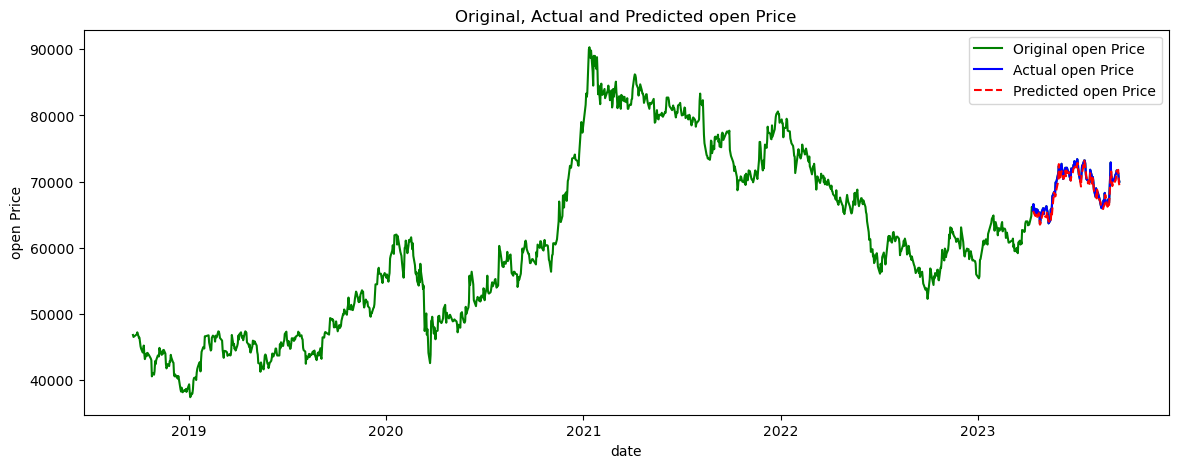

1/1 [==============================] - 0s 30ms/step


Date  Predicted Close Price stock_code stock_name
0 2023-09-21           69337.680038     005930       삼성전자

In [25]:
samsung = stock_price[stock_price['stock_name'] == '삼성전자']
stock_data = samsung

# read the sql 


metadata = stock_data[['stock_code', 'stock_name']].drop_duplicates()

stock_data.drop(['index', 'stock_code', 'stock_name'], axis=1, inplace=True) # delete 'index', 'stock_code', 'stock_name'


# 저장할 폴더 경로
save_folder = './save_weights/'

# 폴더가 존재하지 않으면 생성
if not os.path.exists(save_folder):
    os.makedirs(save_folder)

# save original 'open' prices for later
original_open = stock_data['open'].values

# separate dates for future plotting
dates = pd.to_datetime(stock_data['date'])

# variables for training
cols = list(stock_data)[1:6]

# new dataframe with only training data - 5 columns
stock_data = stock_data[cols].astype(float)

# normalize the dataset
scaler = StandardScaler()
scaler = scaler.fit(stock_data)
stock_data_scaled = scaler.transform(stock_data)

# split to train data and test data
n_train = int(0.9*stock_data_scaled.shape[0])
train_data_scaled = stock_data_scaled[0: n_train]
train_dates = dates[0: n_train]

test_data_scaled = stock_data_scaled[n_train:]
test_dates = dates[n_train:]
# print(test_dates.head(5))

# data reformatting for LSTM
pred_days = 1  # prediction period
seq_len = 14   # sequence length = past days for future prediction.
input_dim = 5  # input_dimension = ['open', 'high', 'low', 'close', 'volume']

trainX = []
trainY = []
testX = []
testY = []

for i in range(seq_len, n_train-pred_days +1):
    trainX.append(train_data_scaled[i - seq_len:i, 0:train_data_scaled.shape[1]])
    trainY.append(train_data_scaled[i + pred_days - 1:i + pred_days, 0])

for i in range(seq_len, len(test_data_scaled)-pred_days +1):
    testX.append(test_data_scaled[i - seq_len:i, 0:test_data_scaled.shape[1]])
    testY.append(test_data_scaled[i + pred_days - 1:i + pred_days, 0])

trainX, trainY = np.array(trainX), np.array(trainY)
testX, testY = np.array(testX), np.array(testY)

# print(trainX.shape, trainY.shape)
# print(testX.shape, testY.shape)

# LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(trainX.shape[1], trainX.shape[2]), # (seq length, input dimension)
               return_sequences=True))
model.add(LSTM(32, return_sequences=False))
model.add(Dense(trainY.shape[1]))

model.summary()

# specify your learning rate
learning_rate = 0.01
# create an Adam optimizer with the specified learning rate
optimizer = Adam(learning_rate=learning_rate)
# compile your model using the custom optimizer
model.compile(optimizer=optimizer, loss='mse')


# Try to load weights
try:
    model.load_weights('./save_weights/lstm_weights.h5')
    
    print("Loaded model weights from disk")
except:
    print("No weights found, training model from scratch")
    # Fit the model
    history = model.fit(trainX, trainY, epochs=30, batch_size=32,
                    validation_split=0.1, verbose=1)
    # Save model weights after training
    model.save_weights('./save_weights/lstm_weights.h5')

    plt.plot(history.history['loss'], label='Training loss')
    plt.plot(history.history['val_loss'], label='Validation loss')
    plt.legend()
    plt.show()


# prediction
prediction = model.predict(testX)

# generate array filled with means for prediction
mean_values_pred = np.repeat(scaler.mean_[np.newaxis, :], prediction.shape[0], axis=0)
mean_values_pred[:, 0] = np.squeeze(prediction)
y_pred = scaler.inverse_transform(mean_values_pred)[:, 0]

# generate array filled with means for testY
mean_values_testY = np.repeat(scaler.mean_[np.newaxis, :], testY.shape[0], axis=0)
mean_values_testY[:, 0] = np.squeeze(testY)
testY_original = scaler.inverse_transform(mean_values_testY)[:, 0]

# plotting
plt.figure(figsize=(14, 5))
plt.plot(dates, original_open, color='green', label='Original open Price')
plt.plot(test_dates[seq_len:], testY_original, color='blue', label='Actual open Price')
plt.plot(test_dates[seq_len:], y_pred, color='red', linestyle='--', label='Predicted open Price')
plt.xlabel('date')
plt.ylabel('open Price')
plt.title('Original, Actual and Predicted open Price')
plt.legend()
plt.show()

# 새로운 테스트 데이터 생성 (2023-09-21일을 포함하여 마지막 14일의 데이터)
new_test_data = stock_data_scaled[-seq_len:].reshape(1, seq_len, input_dim)

# 새로운 테스트 데이터로 예측 수행
new_prediction = model.predict(new_test_data)

# 역변환하여 원래의 주가 단위로 되돌리기
mean_values_pred = np.repeat(scaler.mean_[np.newaxis, :], new_prediction.shape[0], axis=0)
mean_values_pred[:, 0] = np.squeeze(new_prediction)
predicted_close_price = scaler.inverse_transform(mean_values_pred)[:, 0]

# 예측한 날짜 생성 (2023-09-21일부터 2023-09-21일까지)
predicted_dates = pd.date_range(start='2023-09-21', periods=1)

# 예측 결과를 데이터 프레임으로 저장
# 예측한 날짜 범위 생성 (2023-09-21일부터 2023-09-21일까지)
predicted_dates = pd.date_range(start='2023-09-21', periods=1)  # periods를 예측할 날짜 수로 조정할 수 있습니다.

# 예측 결과를 데이터 프레임으로 저장
predicted_data = pd.DataFrame({
    'Date': predicted_dates,
    'Predicted Close Price': predicted_close_price,
    'stock_code': metadata['stock_code'].values[0],
    'stock_name': metadata['stock_name'].values[0]
})

# 저장된 데이터 프레임 출력
predicted_data

In [28]:
stock_price

index        date    open    high     low   close    volume  \
0              0  2018-09-20  6810.0  7120.0  6670.0  7030.0  181397.0   
1              1  2018-09-21  7110.0  7130.0  6270.0  6490.0  359049.0   
2              2  2018-09-27  6600.0  6600.0  6220.0  6360.0  210740.0   
3              3  2018-09-28  6530.0  6530.0  5980.0  6160.0  171325.0   
4              4  2018-10-01  6160.0  6350.0  6050.0  6180.0   77744.0   
...          ...         ...     ...     ...     ...     ...       ...   
2671740  2671740  2023-09-14  6330.0  7170.0  6300.0  6610.0  240627.0   
2671741  2671741  2023-09-15  6640.0  6670.0  6520.0  6610.0   28387.0   
2671742  2671742  2023-09-18  6610.0  6610.0  6350.0  6400.0   29544.0   
2671743  2671743  2023-09-19  6400.0  6460.0  6350.0  6370.0    9452.0   
2671744  2671744  2023-09-20  6370.0  6430.0  6310.0  6370.0   13180.0   

        stock_code stock_name  
0           095570     AJ네트웍스  
1           095570     AJ네트웍스  
2           095570     AJ네트웍스  
3           095570     AJ네트웍스  
4           095570     AJ네트웍스  
...            ...        ...  
2671740     238490         힘스  
2671741     238490         힘스  
2671742     238490         힘스  
2671743     238490         힘스  
2671744     238490         힘스  

[2671745 rows x 9 columns]

In [34]:
stock_data

open    high     low   close    volume
0     6810.0  7120.0  6670.0  7030.0  181397.0
1     7110.0  7130.0  6270.0  6490.0  359049.0
2     6600.0  6600.0  6220.0  6360.0  210740.0
3     6530.0  6530.0  5980.0  6160.0  171325.0
4     6160.0  6350.0  6050.0  6180.0   77744.0
...      ...     ...     ...     ...       ...
1229  4515.0  4650.0  4425.0  4535.0  629381.0
1230  4645.0  4680.0  4480.0  4625.0  586258.0
1231  4630.0  4630.0  4260.0  4320.0  723083.0
1232  4320.0  4500.0  4285.0  4460.0  325245.0
1233  4460.0  4570.0  4300.0  4360.0  375559.0

[1234 rows x 5 columns]

In [37]:
predicted_data_combined


Date  Predicted Close Price stock_code stock_name
0    2023-09-21            4413.608254     095570     AJ네트웍스
1    2023-09-21           19115.458024     006840      AK홀딩스
2    2023-09-21            3665.154136     027410        BGF
3    2023-09-21          148953.601414     282330     BGF리테일
4    2023-09-21            6988.950019     138930    BNK금융지주
...         ...                    ...        ...        ...
2317 2023-09-21            7473.347520     024060       흥구석유
2318 2023-09-21            6457.745076     010240         흥국
2319 2023-09-21            2275.888796     189980     흥국에프엔비
2320 2023-09-21            8685.170650     037440         희림
2321 2023-09-21            6438.295630     238490         힘스

[2322 rows x 4 columns]

In [ ]:
ip =  '52.79.207.181'
engine = create_engine(f'mysql+pymysql://jun:1234qwer@{ip}:3306/quant')
con = pymysql.connect(user='jun',
                      passwd='1234qwer',
                      host= ip,
                      db='quant',
                      charset='utf8')
mycursor = con.cursor()
# read the sql 
sql_query = """
SELECT * FROM df
"""

# con을 사용하여 데이터를 읽음
stock_price = pd.read_sql_query(sql_query, con)


unique_stock_codes = stock_price['stock_code'].unique()
predicted_data_list = []  # 빈 리스트 생성
failed_stock_codes = []


for stock_code in unique_stock_codes:
    # 특정 stock_code에 해당하는 데이터만 추출
    stock_data = stock_price[stock_price['stock_code'] == stock_code]
    # 예측한 날짜 범위 생성 
    predicted_dates = pd.date_range(start=stock_data['date'].iloc[-1] + pd.Timedelta(days=1), periods=1)

    if len(stock_data) >= seq_len:
        metadata = stock_data[['stock_code', 'stock_name']].drop_duplicates()
        stock_data.drop(['index', 'stock_code', 'stock_name'], axis=1, inplace=True) # delete 'index', 'stock_code', 'stock_name'
        try:
            # 저장할 폴더 경로
            save_folder = './save_weights/'

            # 폴더가 존재하지 않으면 생성
            if not os.path.exists(save_folder):
                os.makedirs(save_folder)

            # save original 'open' prices for later
            original_open = stock_data['open'].values

            # separate dates for future plotting
            dates = pd.to_datetime(stock_data['date'])

            # variables for training
            cols = list(stock_data)[1:6]

            # new dataframe with only training data - 5 columns
            stock_data = stock_data[cols].astype(float)

            # normalize the dataset
            scaler = StandardScaler()
            scaler = scaler.fit(stock_data)
            stock_data_scaled = scaler.transform(stock_data)

            # split to train data and test data
            n_train = int(0.9*stock_data_scaled.shape[0])
            train_data_scaled = stock_data_scaled[0: n_train]
            train_dates = dates[0: n_train]

            test_data_scaled = stock_data_scaled[n_train:]
            test_dates = dates[n_train:]
            # print(test_dates.head(5))

            # data reformatting for LSTM
            pred_days = 1  # prediction period
            seq_len = 14   # sequence length = past days for future prediction.
            input_dim = 5  # input_dimension = ['open', 'high', 'low', 'close', 'volume']

            trainX = []
            trainY = []
            testX = []
            testY = []

            for i in range(seq_len, n_train-pred_days +1):
                trainX.append(train_data_scaled[i - seq_len:i, 0:train_data_scaled.shape[1]])
                trainY.append(train_data_scaled[i + pred_days - 1:i + pred_days, 0])

            for i in range(seq_len, len(test_data_scaled)-pred_days +1):
                testX.append(test_data_scaled[i - seq_len:i, 0:test_data_scaled.shape[1]])
                testY.append(test_data_scaled[i + pred_days - 1:i + pred_days, 0])

            trainX, trainY = np.array(trainX), np.array(trainY)
            testX, testY = np.array(testX), np.array(testY)

            # print(trainX.shape, trainY.shape)
            # print(testX.shape, testY.shape)

            # LSTM model
            model = Sequential()
            model.add(LSTM(64, input_shape=(trainX.shape[1], trainX.shape[2]), # (seq length, input dimension)
                        return_sequences=True))
            model.add(LSTM(32, return_sequences=False))
            model.add(Dense(trainY.shape[1]))

            model.summary()

            # specify your learning rate
            learning_rate = 0.01
            # create an Adam optimizer with the specified learning rate
            optimizer = Adam(learning_rate=learning_rate)
            # compile your model using the custom optimizer
            model.compile(optimizer=optimizer, loss='mse')


            # Try to load weights
            try:
                model.load_weights('./save_weights/lstm_weights.h5')
                
                print("Loaded model weights from disk")
            except:
                print("No weights found, training model from scratch")
                # Fit the model
                history = model.fit(trainX, trainY, epochs=30, batch_size=32,
                                validation_split=0.1, verbose=1)
                # Save model weights after training
                model.save_weights('./save_weights/lstm_weights.h5')

                plt.plot(history.history['loss'], label='Training loss')
                plt.plot(history.history['val_loss'], label='Validation loss')
                plt.legend()
                plt.show()


            # prediction
            prediction = model.predict(testX)

            # generate array filled with means for prediction
            mean_values_pred = np.repeat(scaler.mean_[np.newaxis, :], prediction.shape[0], axis=0)
            mean_values_pred[:, 0] = np.squeeze(prediction)
            y_pred = scaler.inverse_transform(mean_values_pred)[:, 0]

            # generate array filled with means for testY
            mean_values_testY = np.repeat(scaler.mean_[np.newaxis, :], testY.shape[0], axis=0)
            mean_values_testY[:, 0] = np.squeeze(testY)
            testY_original = scaler.inverse_transform(mean_values_testY)[:, 0]

            # 새로운 테스트 데이터 생성 (2023-09-21일을 포함하여 마지막 14일의 데이터)
            new_test_data = stock_data_scaled[-seq_len:].reshape(1, seq_len, input_dim)

            # 새로운 테스트 데이터로 예측 수행
            new_prediction = model.predict(new_test_data)

            # 역변환하여 원래의 주가 단위로 되돌리기
            mean_values_pred = np.repeat(scaler.mean_[np.newaxis, :], new_prediction.shape[0], axis=0)
            mean_values_pred[:, 0] = np.squeeze(new_prediction)
            predicted_close_price = scaler.inverse_transform(mean_values_pred)[:, 0]



            # 예측 결과를 데이터 프레임으로 저장
            predicted_data = pd.DataFrame({
                'Date': predicted_dates,
                'Predicted Close Price': predicted_close_price,
                'stock_code': metadata['stock_code'].values[0],
                'stock_name': metadata['stock_name'].values[0]
            })
            predicted_data_list.append(predicted_data)  # 리스트에 예측 데이터 추가

        except Exception as e:
            print(f"Error processing stock_code {stock_code}: {e}")
            failed_stock_codes.append(stock_code)


# 리스트에 있는 데이터를 하나의 DataFrame으로 합치기
predicted_data_combined = pd.concat(predicted_data_list, ignore_index=True)



In [39]:
len(failed_stock_codes)

47

In [32]:
predicted_data

Date  Predicted Close Price stock_code stock_name
0 2023-09-21            3934.255959     000680     LS네트웍스